In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(0, 50, 10000)

In [10]:
ergotropy_1 = np.loadtxt("../outputs/ergotropy/gaussian_ergotropy_1.dat")
in_one_photon = np.loadtxt("../outputs/ergotropy/input_one_photon.dat")
excited_atom = np.loadtxt("../outputs/ergotropy/excited_atom.dat")
gs_atom = np.loadtxt("../outputs/ergotropy/gs_atom.dat")

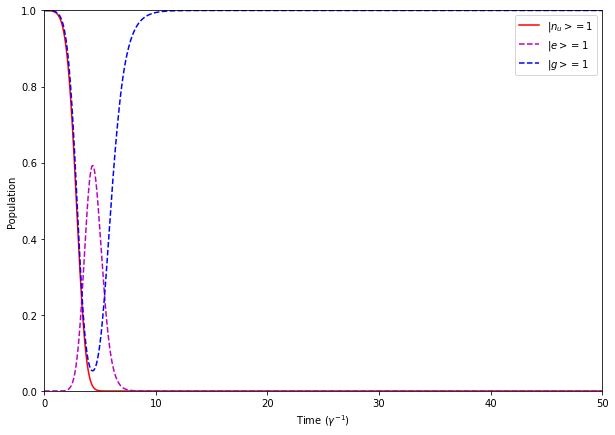

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}> = 1$')
ax.plot(tlist, excited_atom, '--m', label='$|e> = 1$')
ax.plot(tlist, gs_atom, '--b', label='$|g> = 1$')
ax.set_xlim(0,50)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

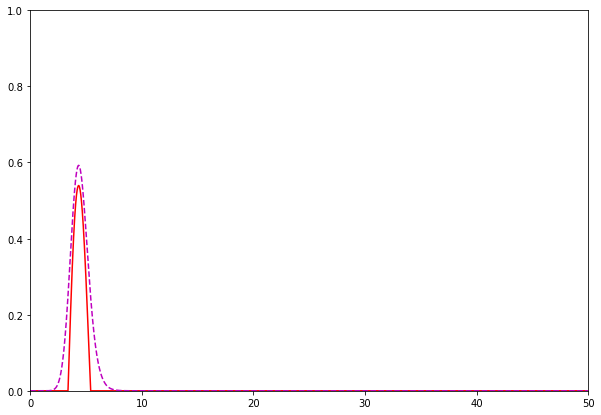

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.set_xlim(0,50)
ax.set_ylim(0,1)

ax.plot(tlist, ergotropy_1, '-r')
ax.plot(tlist, excited_atom, '--m', label='$|e> = 1$')


plt.show()